### Data Preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
data=pd.read_excel("/content/drive/My Drive/Train_dataset.xlsx")
prediction_data=pd.read_excel("/content/drive/My Drive/Test_dataset.xlsx")

In [35]:
train_prob=data['Infect_Prob']
data.drop(labels='Infect_Prob',axis=1,inplace=True)
dataID=data['people_ID']
data.drop(labels='people_ID',axis=1,inplace=True)
data.head()

,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [36]:
prediction_dataID=prediction_data['people_ID']
prediction_data.drop('people_ID',1,inplace=True)
prediction_data.head()

,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [0]:
data["Pulmonary score"]=data["Pulmonary score"].apply(lambda x:int(str(x)[1:]))
prediction_data["Pulmonary score"]=prediction_data["Pulmonary score"].apply(lambda x:int(str(x)[1:]))

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
trans_data=data.copy()
trans_pred_data=prediction_data.copy()

In [0]:
for x in ['Children','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Insurance','FT/month']:
  trans_pred_data[x]=trans_pred_data[x].astype(np.float64)

In [0]:
# print(trans_pred_data.Diuresis.unique(),trans_data.Diuresis.unique())
trans_data.Diuresis.fillna(trans_data.Diuresis.median(),inplace=True)
trans_data.Platelets.fillna(trans_data.Platelets.median(),inplace=True)
trans_data.HBB.fillna(trans_data.HBB.median(),inplace=True)
trans_data['d-dimer'].fillna(trans_data['d-dimer'].median(),inplace=True)
trans_data['Heart rate'].fillna(trans_data['Heart rate'].median(),inplace=True)
trans_data['HDL cholesterol'].fillna(trans_data['HDL cholesterol'].median(),inplace=True)
trans_data['Insurance'].fillna(trans_data['Insurance'].median(),inplace=True)
trans_data['FT/month'].fillna(trans_data['FT/month'].median(),inplace=True)

In [87]:
trans_data.drop("Name",1,inplace=True)
trans_data.drop("Region",1,inplace=True)
trans_data.Occupation.fillna('Other',inplace=True)
trans_data.Children.fillna(100,inplace=True)
trans_data.Mode_transport.fillna('Other',inplace=True)
trans_data.comorbidity.fillna('Other',inplace=True)
trans_data['cardiological pressure'].fillna('Other',inplace=True)

trans_pred_data.drop("Name",1,inplace=True)
trans_pred_data.drop("Region",1,inplace=True)
trans_data.Children.fillna(100,inplace=True)
trans_pred_data.Occupation.fillna('Other',inplace=True)
trans_pred_data.Occupation.fillna('Other',inplace=True)
trans_pred_data.Mode_transport.fillna('Other',inplace=True)
trans_pred_data.comorbidity.fillna('Other',inplace=True)
trans_pred_data['cardiological pressure'].fillna('Other',inplace=True)
lb=LabelEncoder()
for x in trans_data.columns:
  if x not in ['cases/1M','Deaths/1M']:
    print(x)
    lb.fit(trans_data[x])
    trans_data[x]=lb.transform(trans_data[x])
    trans_pred_data[x]=lb.transform(trans_pred_data[x])

Gender
Designation
Married
Children
Occupation
Mode_transport
comorbidity
Age
Coma score
Pulmonary score
cardiological pressure
Diuresis
Platelets
HBB
d-dimer
Heart rate
HDL cholesterol
Charlson Index
Blood Glucose
Insurance
salary
FT/month


In [88]:
trans_pred_data.head()

,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0,1,1,2,3,2,4,1,1,36,0,1,3,278,138,176,40,35,18,17,0,36,10,1
1,1,0,1,2,5,3,4,1,1,37,8,1,3,299,80,118,41,31,26,2,2,15,10,1
2,0,1,1,2,9,0,4,1,1,19,6,0,4,330,25,146,36,38,12,24,0,47,17,2
3,0,1,1,2,9,0,4,1,3,15,9,2,0,96,63,63,11,37,17,13,3,28,3,2
4,0,1,1,2,0,0,4,1,1,35,3,1,3,119,94,187,112,44,33,39,2,20,12,1


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for x in trans_data.columns:
  sc.fit(trans_data[[x]])
  trans_data[[x]]=sc.transform(trans_data[[x]])
  trans_pred_data[[x]]=sc.transform(trans_pred_data[[x]])

In [92]:
trans_data.head()

,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,-0.987755,0.987755,0.513122,-0.136888,-0.162378,0.265675,-0.472554,-0.612505,0.378810,1.691367,-0.272711,1.336249,-0.634619,1.715549,1.654509,-0.420281,-1.024927,0.507079,0.515137,0.589446,1.418137,0.731947,-0.007758,1.264823
1,-0.987755,0.987755,0.513122,1.013400,-0.162378,1.068620,-0.472554,-0.612505,-0.481968,1.430316,1.611645,-1.345259,1.274584,-0.027667,0.829587,-1.091361,1.273339,1.004442,1.475128,-1.270564,0.703701,-0.793498,-1.489078,-0.005454
2,-0.987755,0.987755,-1.948853,-0.136888,-1.206832,0.265675,-0.472554,-0.612505,1.239588,-1.506507,1.073257,0.442413,-1.271020,1.451425,0.904580,0.377760,-1.508773,0.151819,-0.924849,1.688543,0.703701,0.579403,-0.666122,-0.005454
3,-0.987755,0.987755,0.513122,-0.136888,-0.510529,-1.340215,-0.472554,-0.612505,-1.342746,-0.592828,-0.003518,-0.451423,0.638183,1.388036,0.254641,0.921879,-0.008851,-0.771855,0.707135,0.589446,1.418137,-1.479948,1.638153,-0.005454
4,-0.987755,0.987755,-1.948853,1.013400,0.533926,-1.340215,-0.472554,-0.612505,-0.481968,-1.245456,-0.541905,1.336249,-0.634619,1.176737,-1.670179,0.667956,1.345916,-0.274492,1.091131,1.012176,1.418137,0.426858,-0.336940,-0.005454


In [93]:
trans_pred_data.head()

,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,-0.987755,0.987755,0.513122,1.0134,-0.510529,0.265675,0.262431,0.558094,-0.481968,0.647163,-1.618680,-0.451423,0.638183,1.155607,1.629512,1.447860,-0.855581,0.720234,0.035142,-0.256013,-1.439609,0.960764,-0.007758,-0.005454
1,1.012397,-1.012397,0.513122,1.0134,0.185774,1.068620,0.262431,0.558094,-0.481968,0.712426,0.534870,-0.451423,0.638183,1.377471,0.179648,0.395897,-0.831389,0.436027,0.803134,-1.524202,-0.010736,-0.640953,-0.007758,-0.005454
2,-0.987755,0.987755,0.513122,1.0134,1.578380,-1.340215,0.262431,0.558094,-0.481968,-0.462303,-0.003518,-1.345259,1.274584,1.704984,-1.195224,0.903741,-0.952350,0.933390,-0.540853,0.335808,-1.439609,1.799759,1.144380,1.264823
3,-0.987755,0.987755,0.513122,1.0134,1.578380,-1.340215,0.262431,0.558094,1.239588,-0.723354,0.804064,0.442413,-1.271020,-0.767213,-0.245313,-0.601654,-1.557157,0.862338,-0.060857,-0.594197,0.703701,0.350586,-1.159896,1.264823
4,-0.987755,0.987755,0.513122,1.0134,-1.554984,-1.340215,0.262431,0.558094,-0.481968,0.581901,-0.811099,-0.451423,0.638183,-0.524219,0.529615,1.647370,0.886263,1.359701,1.475128,1.603997,-0.010736,-0.259592,0.321424,-0.005454


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_val,y_train,y_val=train_test_split(trans_data,train_prob,test_size=0.2)

### XGBoost lassifier

In [0]:
import xgboost

In [97]:
acc_sc=[]
for i in range(1,20):
  model=xgboost.XGBRegressor(max_depth=i)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_val)
  acc_sc.append(np.mean(np.abs(y_pred-np.asarray(y_val))))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

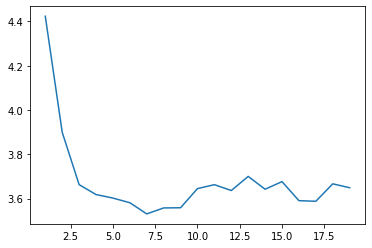

In [98]:
plt.plot(range(1,20),acc_sc)

In [99]:
max_index=acc_sc.index(min(acc_sc))+1
print(max_index,min(acc_sc))

7 3.530826326715141


In [102]:
model_act=xgboost.XGBRegressor(7)
model_act.fit(trans_data,train_prob)
y_pred_act=model_act.predict(trans_pred_data)
y_pred_act[:100]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([52.770878, 52.602516, 52.869007, 52.469013, 52.729702, 52.79358 ,
       52.69187 , 52.424927, 52.602856, 52.757835, 52.49885 , 52.65075 ,
       52.45453 , 71.6061  , 52.789158, 65.42462 , 52.505074, 52.38516 ,
       52.495388, 52.567554, 60.940235, 52.637444, 58.935997, 52.6446  ,
       43.016487, 52.559498, 52.41759 , 52.818832, 52.67679 , 52.38138 ,
       52.75762 , 52.369328, 52.558758, 52.83804 , 52.72421 , 69.79214 ,
       52.64444 , 52.706005, 52.53692 , 68.21362 , 52.62308 , 52.642746,
       52.453564, 52.664288, 52.5462  , 52.40602 , 52.73423 , 52.687325,
       65.82655 , 52.339657, 50.539978, 52.40348 , 52.415806, 52.275112,
       52.862328, 77.61052 , 52.490482, 52.690025, 52.552048, 52.647785,
       52.42853 , 52.46183 , 52.479134, 52.34772 , 52.396175, 52.34026 ,
       67.94891 , 52.694237, 42.554485, 52.60248 , 52.562275, 52.201897,
       52.200672, 52.479515, 68.76292 , 52.72885 , 52.154   , 74.5595  ,
       52.426506, 52.551727, 52.50278 , 68.42587 , 

In [0]:
predicted_prob['people ID']=prediction_dataID
predicted_prob['Infect Prob']=pd.DataFrame(y_pred_act)

In [115]:
predicted_prob.head(50)

,Infect Prob,people ID
0,52.770878,5942
1,52.602516,18664
2,52.869007,5603
3,52.469013,5649
4,52.729702,5099
5,52.793579,18749
6,52.691872,5228
7,52.424927,5559
8,52.602856,5220
9,52.757835,5476
